Self Organizing Map

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class SOM(object):
    """
    Self organizing map
    """

    def __init__(self, _input, initial_learning_rate, initial_iteration, som_size=(5, 6), radius=2):
        """
        :param _input: input ndarray data
        :param initial_learning_rate: initial learning rate
        :param initial_iteration: initial epoch
        :param som_size: the map matrix size
        :param radius: initial radius for neghborhood function
        """
        self.som_d = _input.shape[1]
        self.som_h = som_size[0]
        self.som_w = som_size[1]
        self.input = _input
        self.initial_iteration = initial_iteration
        self.initial_learning_rate = initial_learning_rate
        self.initial_sigma = radius / 2
        self.initial_radius = radius
        self.som_map = np.zeros(shape=(self.som_h, self.som_w, self.som_d))

    def random_weight_vector(self):
        # Assign random weight vectors to all the neurons
        for h in range(self.som_h):
            for w in range(self.som_w):
                # Squeezed the matrix into an ndarray.
                self.som_map[h, w, :] = np.squeeze(np.random.randint(0, 255, (self.som_d, 1)))
        return self.som_map

    def find_bmu(self, v):
        """
        finds the best matching unit
        :param v: input vector
        :return: the best matching neuron coordinates in a tuple
        """
        closest_prototype = -1
        closest_distance = -1
        for i in range(self.som_h):
            for j in range(self.som_w):
                dist = self.distance(v, self.som_map[i][j])
                if dist < closest_distance or closest_distance == -1:
                    closest_distance = dist
                    closest_prototype = (i, j)
        return closest_prototype, closest_distance

    def distance(self, x, w):
        return np.linalg.norm(np.subtract(x, w), axis=-1)

    def update_cell(self, BMU, cell, iteration):
      '''integrated with update som method'''
      pass

    def update_som(self, BMU, x, iteration):
        """
        Updates the weights of the neurons inside the map
        :param x: numpy array input sample
        :param BMU: the best matching unit found for the input sample
        :param iteration: current learning process iteration
        :return: the updates som map as numpy array
        """

        learning_rate = self.L(iteration)
        self.neighbour_val = self.N(BMU, iteration)

        for r in range(self.som_h):
            for c in range(self.som_w):
                self.som_map[r, c, :] += learning_rate * self.neighbour_val[r, c] * (x - self.som_map[r, c, :])

        return self.som_map

    def L(self, iteration):
      '''updating learning rate, gradually decreasing as the learning process goes forward
      preventing it from dropping below 0.1, for the sake of convergence'''
        # learning_rate = self.initial_learning_rate * np.exp(-epoch/self.initial_epoch)
      l = self.initial_learning_rate / (1 + iteration / (self.initial_iteration / 2))
      if l >= 0.1:
          return l
      else:
          return 0.1

    def radius(self, iteration):
      '''updating radius, gradually decreasing as the learning process goes forward
      preventing it from dropping below 1.5, for the sake of convergence'''
      r = self.initial_radius / (1 + iteration / (self.initial_iteration / 2))
      if r >= 1.5:
          return r
      else:
          return 1.5

    def sigma(self, iteration):
      return self.initial_sigma / (1 + iteration / (self.initial_iteration / 2))

    def N(self, BMU, iteration):
        """
        
        :param BMU: the best matching unit found for the input sample
        :param iteration: current learning process iteration
        """
        # Initialize matrix to store neighbourhood functions
        # of each neurons on the map
        self.neighbour_val = np.zeros((self.som_h, self.som_w))

        radius = self.radius(iteration)
        # radius for neighbors
        radiusMinCol = int(BMU[1] - radius)
        if radiusMinCol < 0:
            radiusMinCol = 0

        radiusMaxCol = int(BMU[1] + radius)
        if radiusMaxCol > self.som_w:
            radiusMaxCol = self.som_w

        radiusMinRow = int(BMU[0] - radius)
        if radiusMinRow < 0:
            radiusMinRow = 0

        radiusMaxRow = int(BMU[0] + radius)
        if radiusMaxRow > self.som_h:
            radiusMaxRow = self.som_h

        # compute the neighbourhood function for all the neurons
        for r in range(radiusMinRow, radiusMaxRow):
            for c in range(radiusMinCol, radiusMaxCol):
                if r == BMU[0] & c == BMU[1]:
                    self.neighbour_val[r, c] = 1
                    continue
                else:
                    distance = self.distance(np.array([r, c]), np.array([BMU[0], BMU[1]]))
                    self.neighbour_val[r, c] = np.exp(-distance / (2 * np.power(self.sigma(iteration), 2)))
        return self.neighbour_val

    def train(self):
        
        self.som_map = self.random_weight_vector()

        plt.imshow(self.som_map.astype(np.uint8))
        plt.title('the initial random map')
        plt.show()

        dis = []
        for _iter in range(self.initial_iteration):
            # Randomly selecting a vector from the input
            _input = self.input[int(np.random.rand(1) * (self.input.shape[0]))]
            bmu, closest_distance = self.find_bmu(_input)
            self.update_som(bmu, _input, _iter)
            # if closest_distance < .0001:
            #     print('finished at iteration:', _iter)
            #     break
            dis.append(closest_distance)

        plt.plot(range(len(dis)), dis)
        plt.title('the minimum distance between BMU and input cell')
        plt.xlabel('iteration')
        plt.ylabel('closest_distance')
        plt.show()


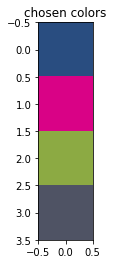

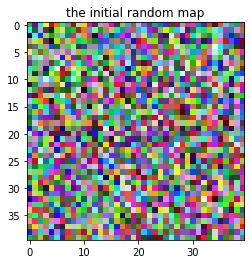

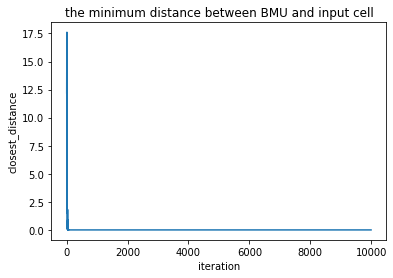

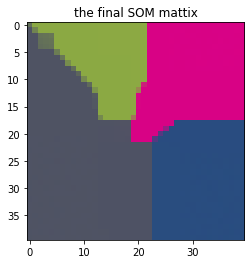

In [ ]:
# choosing 4 colors randomly
_input = np.random.randint(0, 255, (4, 3))
plt.imshow(_input.reshape(4, 1, 3))
plt.title('chosen colors')
plt.show()

som = SOM(_input,
          initial_learning_rate=0.5,
          initial_iteration=10000,
          som_size=(40, 40),
          radius=15)

som.train()
plt.imshow(som.som_map.astype(np.uint8))
plt.title('the final SOM mattix')
plt.show()

